# Transfer equation
## Formulation

$$
\begin{cases}
\frac{\partial u}{\partial t} + с \frac{\partial u}{\partial x} = 0, \;\; -\infty < x < +\infty, \;\; t \ge 0\\
u(x, 0) = g(x), \;\; -\infty < x < +\infty \\
\end{cases}
$$

$$
g(x) =
\begin{cases}
0, & x < 0,\\
x(2-x), & 0 \le x \le 2,\\
0, & x > 2
\end{cases}
$$

## Numerical solution

$$\begin{cases}
\frac{u_i^{n+1} - u_i^{n}}{\tau} + c \frac{u_{i}^n - u_{i-1}^n}{h} = 0,\\
u_i^0 = g(x_i),\; i = \overline{1, N-1}
\end{cases}$$

## Precise solution

$$
u(x, t) = g(x - ct)
$$

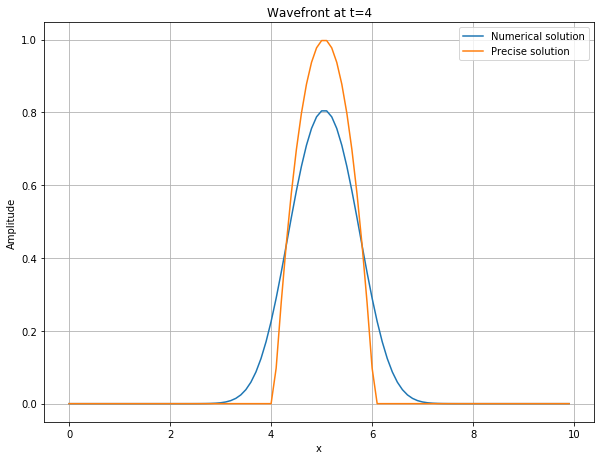

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def g(xs):
    ys = np.zeros_like(xs)
    idx = (0 < xs) & (xs < 2) 
    ys[idx] = xs[idx]*(2-xs[idx])
    return ys

def u_precise(c, t, xs):
    return g(xs - c*t)

T = 4
c = 1
h = 0.1
dt = 0.05
a = 0
b = 10

lambd = c*dt/h

fig = plt.figure(figsize=(8.5, 6.5))
ax = fig.add_subplot(111)
ax.set_title(f'Wavefront at t={T}')
ax.set_xlabel('x')
ax.set_ylabel('Amplitude')

xs = np.arange(a, b, h)
u = g(xs)

A = np.diag(np.ones(len(xs)) - lambd) + np.diag(lambd*np.ones(len(xs)-1), -1)
A[0, 0] = 1
t = 0
while t < T + dt/2:
    # ax.plot(xs, u, label=f't={t:g}')
    u = np.dot(A, u)
    t += dt
ax.plot(xs, u, label='Numerical solution')
u_pr = u_precise(c, T + dt, xs)
ax.plot(xs, u_pr, label='Precise solution')

ax.legend()
ax.grid()

plt.tight_layout()
plt.show()

In [28]:
from matplotlib.animation import FuncAnimation
plt.rcParams["animation.html"] = "html5"

class DrawGraph(object):
    def __init__(self, ax, T, c, h, dt, g, a, b, u_precise):
        self.ax = ax
        
        self.T = T
        self.c = c
        self.h = h
        self.dt = dt
        self.xs = np.arange(a, b, h)
        self.u = g(self.xs)
        self.u_precise = u_precise
        self.lambd = self.c*self.dt/self.h

        self.A = np.diag(np.ones(len(self.xs)) - self.lambd) + \
                 np.diag(self.lambd*np.ones(len(self.xs)-1), -1)
        self.A[0, 0] = 1
        
        self.line, = ax.plot(self.xs, self.u, 'r-')
        self.precise,  = ax.plot(self.xs, \
                                 self.u_precise(self.c, 0, self.xs), 'g-')
        
        # Set up plot parameters
        self.ax.set_xlim(a, b)
        self.ax.set_ylim(min(self.u) - 0.02, max(self.u) + 0.02)
        self.ax.grid(True)

    def init(self):
        self.line.set_data([], [])
        self.precise.set_data([], [])
        return self.line, self.precise

    def __call__(self, i):     
        self.u = np.dot(self.A, self.u)
        self.line.set_data(self.xs, self.u)
        self.precise.set_data(self.xs, self.u_precise(self.c, i + self.dt, self.xs))
        return self.line, self.precise

In [29]:
fig, ax = plt.subplots()
ax.set_title(r'Wavefront depending on time ($\frac{c\cdot dt}{h} = 1$)')
ax.set_xlabel('x')
ax.set_ylabel('Amplitude')

T = 8
c = 1
h = 0.05
dt = 0.05
a = 0
b = 10

dg = DrawGraph(ax, T, c, h, dt, g, a, b, u_precise)
anim = FuncAnimation(fig, dg, frames=np.arange(0, T + dt/2, dt), init_func=dg.init,
                     interval=50, blit=True)

In [30]:
anim

In [31]:
new_fig, new_ax = plt.subplots()
new_ax.set_title(r'Wavefront depending on time ($\frac{c\cdot dt}{h} = 0.5$)')
new_ax.set_xlabel('x')
new_ax.set_ylabel('Amplitude')

T = 8
c = 1
h = 0.05
dt = 0.025
a = 0
b = 10

new_dg = DrawGraph(new_ax, T, c, h, dt, g, a, b, u_precise)
new_anim = FuncAnimation(new_fig, new_dg, frames=np.arange(0, T + dt/2, dt), 
                         init_func=new_dg.init, interval=25, blit=True)

In [32]:
new_anim